# Example_3_4

Testing convergence rate of non strongly convex functions/algorithms

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [ ]:
#!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [1]:
import numpy as np
from local.lib.utils import ridge_no_reg, bounds
import matplotlib.pyplot as plt

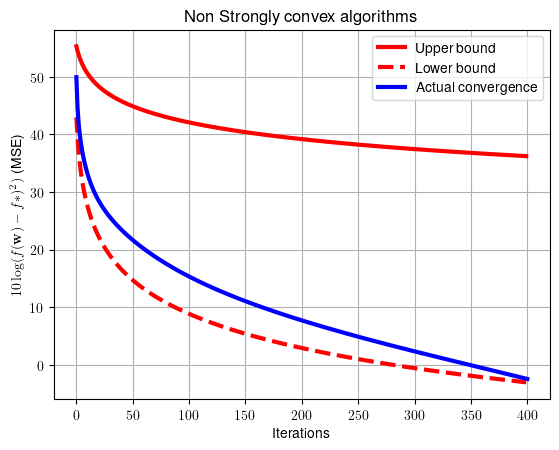

In [2]:
# Problem definition
Nc=500;                     # Number of columns
Nr=400;                     # Number of rows
Niter=400;
X=np.random.randn(Nr,Nc);
wopt_nor=np.random.randn(Nc,1); 
y=X@wopt_nor+np.random.randn(Nr,1)*np.sqrt(.001);    # We generate the ragression data

autoval=np.real(np.linalg.eig(X.T@X)[0]);
L=np.max(autoval);
lambd=0.04*L;
wopt_strong=np.linalg.inv(X.T@X+lambd*np.eye(Nc))@X.T@y;

Ls=np.max(autoval)+lambd;
mu=np.min(np.abs(autoval))+lambd;
eta=1/L;

# We calculate the bounds
bb, bm, _, _, _, _=bounds(Niter,L,Ls,mu,np.linalg.norm(wopt_nor)**2,np.linalg.norm(wopt_strong)**2);

# Ridge without regularizer non strongly convex
w=np.zeros((Nc,Niter+1));
f_nr, f_opt = ridge_no_reg(Niter,w,X,y,eta,wopt_nor);

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.plot(range(Niter),10*np.log10(bb),color='red',linewidth = 3, label = 'Upper bound')
plt.plot(range(Niter),10*np.log10(bm),color='red',linestyle='dashed', linewidth = 3, label = 'Lower bound')
plt. plot(range(Niter+1),10*np.log10(np.abs(f_nr-f_opt)),'b', linewidth = 3, label = 'Actual convergence')
plt.legend()
plt.grid()
plt.title('Non Strongly convex algorithms')
plt.xlabel('Iterations')
plt.ylabel(r'$10\log(f({\bf{w}})-f*)^2)$ (MSE)')
plt.show()

